In [ ]:
import warnings
import os
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/NNDL_Project/Translated_Dataset/')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/NNDL_Project/Translated_Dataset/"))
file_count = len(files)
#print(file_count)

['Dissection', 'Knot_Tying', 'Needle_Driving']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/NNDL_Project/Translated_Dataset/'
base_dir = '/content/drive/MyDrive/NNDL_Project/Image_Classification/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create three folders 
# (dissection, needle_driving, knot_tying)

train_cloud_dir = os.path.join(train_dir, 'dissection')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'knot_tying')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'needle_driving')
os.mkdir(train_rainy_dir)

#Under validation folder create three folders 
# (dissection, needle_driving, knot_tying)

validation_cloud_dir = os.path.join(validation_dir, 'dissection')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'knot_tying')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'needle_driving')
os.mkdir(validation_rainy_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
DISSECTION_SOURCE_DIR = '/content/drive/MyDrive/NNDL_Project/Translated_Dataset/Dissection/'
TRAINING_DISSECTION_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/train/dissection/'
VALID_DISSECTION_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/dissection/'

KNOT_SOURCE_DIR = '/content/drive/MyDrive/NNDL_Project/Translated_Dataset/Knot_Tying/'
TRAINING_KNOT_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/train/knot_tying/'
VALID_KNOT_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/knot_tying/'

NEELDE_SOURCE_DIR = '/content/drive/MyDrive/NNDL_Project/Translated_Dataset/Needle_Driving/'
TRAINING_NEELDE_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/train/needle_driving/'
VALID_NEEDLE_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/needle_driving/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .90

split_data(DISSECTION_SOURCE_DIR, TRAINING_DISSECTION_DIR, VALID_DISSECTION_DIR, split_size)
split_data(KNOT_SOURCE_DIR, TRAINING_KNOT_DIR, VALID_KNOT_DIR, split_size)
split_data(NEELDE_SOURCE_DIR, TRAINING_NEELDE_DIR, VALID_NEEDLE_DIR, split_size)

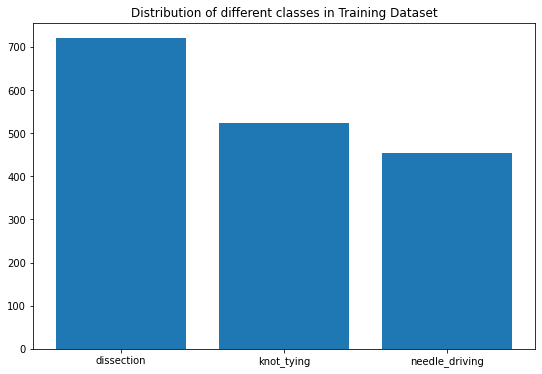

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['dissection', 'knot_tying', 'needle_driving']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/NNDL_Project/Image_Classification/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['dissection', 'knot_tying', 'needle_driving']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/NNDL_Project/Image_Classification/train/'+i+'/'))))

Training dissection images are: 720
Training knot_tying images are: 523
Training needle_driving images are: 453


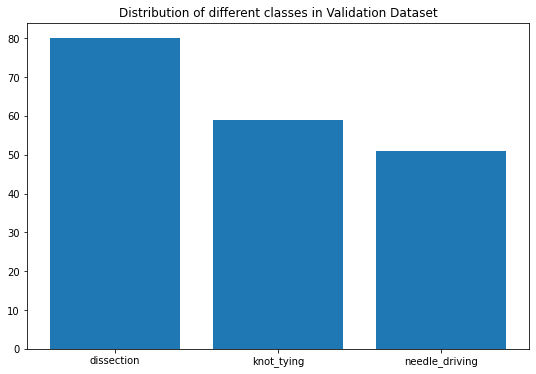

In [ ]:
image_folder = ['dissection', 'knot_tying', 'needle_driving']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['dissection', 'knot_tying', 'needle_driving']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/'+i+'/'))))

Valid dissection images are: 80
Valid knot_tying images are: 59
Valid needle_driving images are: 51


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
|img_width=256; img_height=256
batch_size=32

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1696 images belonging to 3 classes.


In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 190 images belonging to 3 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_aug_best_weights_20.h5'
metric = 'val_accuracy'
best_model = ModelCheckpoint(best_model_file, metric='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    # Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

## 10 Epochs

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 1.1170 - accuracy: 0.4180
Epoch 1: val_loss improved from inf to 1.08380, saving model to /content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_aug_best_weights_20.h5
53/53 [==============================] - 42s 594ms/step - loss: 1.1170 - accuracy: 0.4180 - val_loss: 1.0838 - val_accuracy: 0.4211
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 0.9711 - accuracy: 0.5212
Epoch 2: val_loss improved from 1.08380 to 0.63181, saving model to /content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_aug_best_weights_20.h5
53/53 [==============================] - 32s 601ms/step - loss: 0.9711 - accuracy: 0.5212 - val_loss: 0.6318 - val_accuracy: 0.7105
Epoch 3/10
53/53 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.6327
Epoch 3: val_loss did not improve from 0.63181
53/53 [==============================] - 31s 593ms/step - loss: 0.8196 - accuracy: 0.6327 - val_loss: 0.702

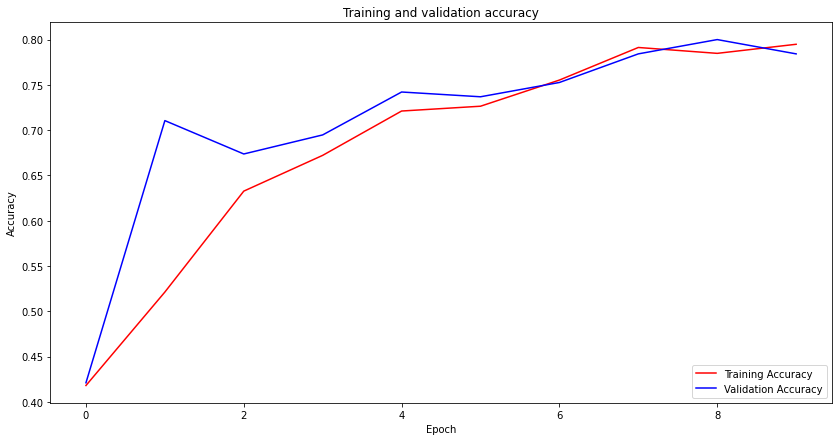

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

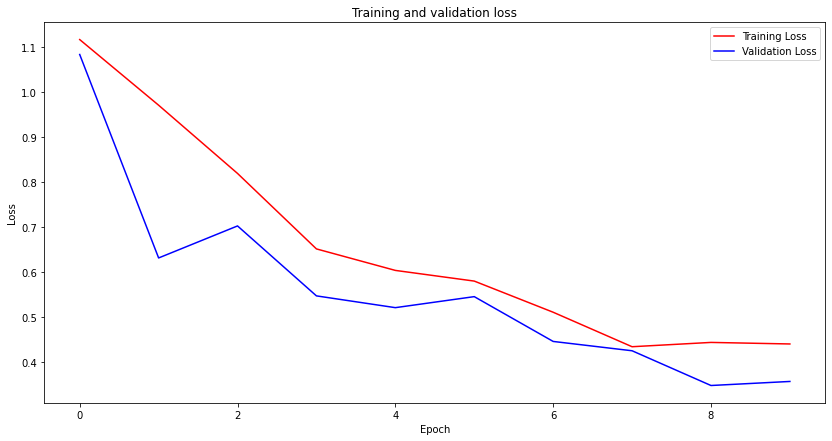

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

## Experiment 2

In [ ]:
img_width=256; img_height=256
batch_size=16

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1696 images belonging to 3 classes.


In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/NNDL_Project/Image_Classification/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 190 images belonging to 3 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_EXP3_best_weights_20.h5'
metric = 'val_accuracy'
best_model = ModelCheckpoint(best_model_file, metric='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    # Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
adam = Adam(lr=0.002)
model.compile(optimizer=adam, 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/NNDL_Project/CNN_best_model.h5')

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

<ipython-input-8-e8a232fdc851>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
106/106 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.6350
Epoch 1: val_loss improved from inf to 0.40342, saving model to /content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_EXP3_best_weights_20.h5
106/106 [==============================] - 930s 9s/step - loss: 0.6961 - accuracy: 0.6350 - val_loss: 0.4034 - val_accuracy: 0.8316
Epoch 2/20
106/106 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.8744
Epoch 2: val_loss improved from 0.40342 to 0.25005, saving model to /content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_EXP3_best_weights_20.h5
106/106 [==============================] - 11s 100ms/step - loss: 0.2787 - accuracy: 0.8744 - val_loss: 0.2501 - val_accuracy: 0.8947
Epoch 3/20
106/106 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9139
Epoch 3: val_loss improved from 0.25005 to 0.20469, saving model to /content/drive/MyDrive/NNDL_Project/Image_Classification/CNN_EXP3_best_weigh

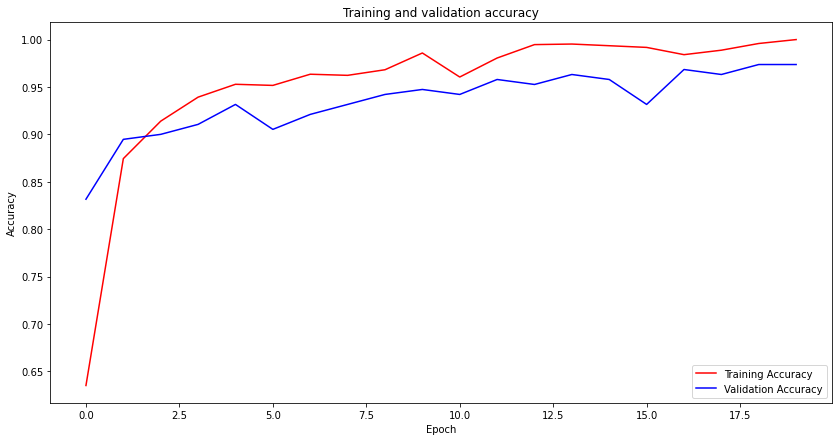

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

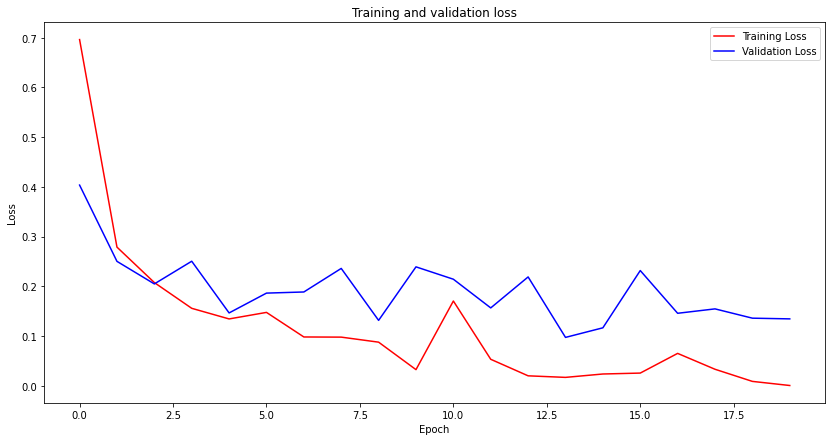

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
import cv2
img1 = cv2.imread('/content/drive/MyDrive/NNDL_Project/Test_Images/Video_3/100.png',1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [ ]:
import cv2
img1 = cv2.imread('/content/drive/MyDrive/NNDL_Project/Dataset/knot_tying/testB/21.jpg',1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

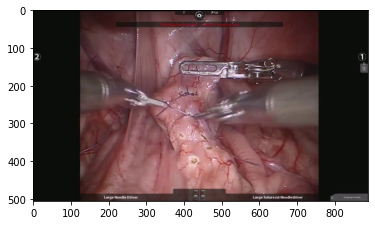

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(img1)

In [ ]:
rescale = 1/255.0
img1 = img1*rescale
img1 = cv2.resize(img1,(256,256))
img1.shape

(256, 256, 3)

In [ ]:
import numpy as np
from math import exp

In [ ]:
pred = model.predict(np.array(img1).reshape(-1,256, 256, 3))

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(np.argmax(pred, axis=1))

[1]


In [ ]:
model.save("/content/drive/MyDrive/NNDL_Project/CNN_best_model.h5")

In [ ]:
## Function for counting the number of frames in a video 
def count_frames(path):
  video = cv2.VideoCapture(path)
  total = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  video.release()
  return total

In [ ]:
def extract_test_images(path_to_video,path_for_saving):
  path = path_to_video
  test_image_num=0
  total = count_frames(path)
  print(path," total = ",total)
  cap= cv2.VideoCapture(path)
  while(cap.isOpened()):
      ret, frame = cap.read()
      if ret == False:
        break
      else:
        test_image_num+=1
        cv2.imwrite(path_for_saving+str(test_image_num)+'.png',frame)
  cap.release()
  cv2.destroyAllWindows()

In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_0/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0000.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0000.mp4  total =  5463


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_1/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0001.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0001.mp4  total =  5372


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_2/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0002.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0002.mp4  total =  27013


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_3/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0003.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0003.mp4  total =  4238


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_4/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0004.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0004.mp4  total =  3935


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_5/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0005.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0005.mp4  total =  6257


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_6/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0006.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0006.mp4  total =  10473


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_7/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0007.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0007.mp4  total =  6272


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_8/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0008.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0008.mp4  total =  10511


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_9/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0009.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0009.mp4  total =  6666


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_10/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0010.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0010.mp4  total =  22130


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_11/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0011.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0011.mp4  total =  4660


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_12/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0012.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0012.mp4  total =  8854


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_13/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0013.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0013.mp4  total =  14046


In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_14/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0014.mp4"
extract_test_images(video_path,path_for_saving)

In [ ]:
path_for_saving = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_15/"
video_path = "/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0015.mp4"
extract_test_images(video_path,path_for_saving)

/content/drive/MyDrive/Dataset/Test Videos/test/test_video_0015.mp4  total =  4208


In [ ]:
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_13/"
paths = glob.glob(dir+ '*.png')
print(len(paths))

0


In [ ]:
paths

In [ ]:
# import glob
# dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_3/"
# v3_paths = glob.glob(dir+ '*.png')
# v3_paths.sort()
# v3_paths

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_0/"
v3_paths = glob.glob(dir+ '*.png')
total_images = len(v3_paths)
print(total_images)

5463


In [ ]:
def get_prediction(path,model,total_images):
  labels = []
  x=1
  while x<=total_images:
    img = cv2.imread(path+str(x)+".png",1)
    x+=1
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rescale = 1/255.0
    img = cv2.resize(img,(256,256))
    img = img*rescale
    pred = model.predict(np.array(img).reshape(-1,256, 256, 3))
    prob1 = exp(pred[0][0]) / (exp(pred[0][0]) + exp(pred[0][1]) + exp(pred[0][2]))
    prob2 = exp(pred[0][1]) / (exp(pred[0][0]) + exp(pred[0][1]) + exp(pred[0][2]))
    prob3 = exp(pred[0][2]) / (exp(pred[0][0]) + exp(pred[0][1]) + exp(pred[0][2]))
    probs = [prob1,prob2,prob3]
    label = np.argmax(pred, axis=1)
    print("Dissection = ",prob1,"Knot_Tying = ",prob2,"Needle_Driving = ",prob3,"Label = ",label, "Count = ",x-1)
    labels.append(label)
  return labels

In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step
Dissection =  0.2119796831474366 Knot_Tying =  0.2119517321248239 Needle_Driving =  0.5760685847277395 Label =  [2]
1/1 [==============================] - 0s 25ms/step
Dissection =  0.21348514035614843 Knot_Tying =  0.21235108317761595 Needle_Driving =  0.5741637764662356 Label =  [2]
1/1 [==============================] - 0s 17ms/step
Dissection =  0.21199634347424529 Knot_Tying =  0.21195618156924395 Needle_Driving =  0.5760474749565109 Label =  [2]
1/1 [==============================] - 0s 16ms/step
Dissection =  0.5653206094816827 Knot_Tying =  0.21415560599387998 Needle_Driving =  0.22052378452443722 Label =  [0]
1/1 [==============================] - 0s 16ms/step
Dissection =  0.5760752174339825 Knot_Tying =  0.21195142774346012 Needle_Driving =  0.21197335482255739 Label =  [0]
1/1 [==============================] - 0s 17ms/step
Dissection =  0.5702349111200652 Knot_Tying =  0.

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video3_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_0/"
v3_paths = glob.glob(dir+ '*.png')
total_images = len(v3_paths)
print(total_images)

5463


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step
Dissection =  0.2119415576170575 Knot_Tying =  0.21194155761718983 Needle_Driving =  0.5761168847657527 Label =  [2]
1/1 [==============================] - 0s 21ms/step
Dissection =  0.2119415576170308 Knot_Tying =  0.21194155761728897 Needle_Driving =  0.5761168847656802 Label =  [2]
1/1 [==============================] - 0s 22ms/step
Dissection =  0.21194155761708483 Knot_Tying =  0.21194155761708786 Needle_Driving =  0.5761168847658275 Label =  [2]
1/1 [==============================] - 0s 20ms/step
Dissection =  0.21194155761708466 Knot_Tying =  0.21194155761708838 Needle_Driving =  0.576116884765827 Label =  [2]
1/1 [==============================] - 0s 23ms/step
Dissection =  0.21194155761708539 Knot_Tying =  0.21194155761708558 Needle_Driving =  0.5761168847658289 Label =  [2]
1/1 [==============================] - 0s 27ms/step
Dissection =  0.21194155761708539 Knot_Tying =  0.

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_0_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_1/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

5372


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
Dissection =  0.21300685920640378 Knot_Tying =  0.5711144573989595 Needle_Driving =  0.21587868339463667 Label =  [1] Count =  2873
1/1 [==============================] - 0s 32ms/step
Dissection =  0.2262150523019562 Knot_Tying =  0.2807314907875835 Needle_Driving =  0.4930534569104603 Label =  [2] Count =  2874
1/1 [==============================] - 0s 22ms/step
Dissection =  0.21227984979017533 Knot_Tying =  0.574519258912056 Needle_Driving =  0.2132008912977686 Label =  [1] Count =  2875
1/1 [==============================] - 0s 21ms/step
Dissection =  0.21220227230316693 Knot_Tying =  0.5750152858967489 Needle_Driving =  0.2127824418000842 Label =  [1] Count =  2876
1/1 [==============================] - 0s 24ms/step
Dissection =  0.2127014493804086 Knot_Tying =  0.5725284217850372 Needle_Driving =  0.21477012883455415 Label =  [1] Count =  2877
1/1 [==============================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_1_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_2/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

27013


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
Dissection =  0.21986310308088491 Knot_Tying =  0.21401023521153412 Needle_Driving =  0.566126661707581 Label =  [2] Count =  24514
1/1 [==============================] - 0s 22ms/step
Dissection =  0.22721442913372197 Knot_Tying =  0.21587590280136282 Needle_Driving =  0.5569096680649154 Label =  [2] Count =  24515
1/1 [==============================] - 0s 22ms/step
Dissection =  0.3357743412995662 Knot_Tying =  0.2317459775268621 Needle_Driving =  0.4324796811735718 Label =  [2] Count =  24516
1/1 [==============================] - 0s 39ms/step
Dissection =  0.5217647489858669 Knot_Tying =  0.22246061104305062 Needle_Driving =  0.2557746399710825 Label =  [0] Count =  24517
1/1 [==============================] - 0s 66ms/step
Dissection =  0.5516937968666255 Knot_Tying =  0.2180093131575187 Needle_Driving =  0.2302968899758559 Label =  [0] Count =  24518
1/1 [=========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_2_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_4/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

3935


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step
Dissection =  0.211941925716684 Knot_Tying =  0.21194293844975526 Needle_Driving =  0.5761151358335608 Label =  [2] Count =  1436
1/1 [==============================] - 0s 17ms/step
Dissection =  0.21194171254099806 Knot_Tying =  0.2119421507928406 Needle_Driving =  0.5761161366661615 Label =  [2] Count =  1437
1/1 [==============================] - 0s 15ms/step
Dissection =  0.21194179997843657 Knot_Tying =  0.21194245210654886 Needle_Driving =  0.5761157479150146 Label =  [2] Count =  1438
1/1 [==============================] - 0s 29ms/step
Dissection =  0.2119417870945704 Knot_Tying =  0.21194242257904872 Needle_Driving =  0.5761157903263809 Label =  [2] Count =  1439
1/1 [==============================] - 0s 15ms/step
Dissection =  0.21194234094293338 Knot_Tying =  0.21194448712922756 Needle_Driving =  0.5761131719278391 Label =  [2] Count =  1440
1/1 [============================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_4_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_5/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

6257


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
Dissection =  0.21648899671119062 Knot_Tying =  0.22881572092437866 Needle_Driving =  0.5546952823644307 Label =  [2] Count =  3758
1/1 [==============================] - 0s 33ms/step
Dissection =  0.22560734897950593 Knot_Tying =  0.2724858872067492 Needle_Driving =  0.5019067638137449 Label =  [2] Count =  3759
1/1 [==============================] - 0s 21ms/step
Dissection =  0.2255975249930577 Knot_Tying =  0.2550026972276782 Needle_Driving =  0.5193997777792642 Label =  [2] Count =  3760
1/1 [==============================] - 0s 30ms/step
Dissection =  0.21281547637703846 Knot_Tying =  0.21484454814081536 Needle_Driving =  0.5723399754821461 Label =  [2] Count =  3761
1/1 [==============================] - 0s 22ms/step
Dissection =  0.21460186407940032 Knot_Tying =  0.22044552612224477 Needle_Driving =  0.5649526097983548 Label =  [2] Count =  3762
1/1 [===========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_5_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_6/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

10473


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
Dissection =  0.2119415576170853 Knot_Tying =  0.2119415576170859 Needle_Driving =  0.5761168847658287 Label =  [2] Count =  7974
1/1 [==============================] - 0s 21ms/step
Dissection =  0.21194155761708539 Knot_Tying =  0.21194155761708577 Needle_Driving =  0.5761168847658289 Label =  [2] Count =  7975
1/1 [==============================] - 0s 21ms/step
Dissection =  0.21194155761708539 Knot_Tying =  0.21194155761708558 Needle_Driving =  0.5761168847658289 Label =  [2] Count =  7976
1/1 [==============================] - 0s 22ms/step
Dissection =  0.21194155761708547 Knot_Tying =  0.21194155761708547 Needle_Driving =  0.5761168847658291 Label =  [2] Count =  7977
1/1 [==============================] - 0s 35ms/step
Dissection =  0.21194155761708547 Knot_Tying =  0.21194155761708547 Needle_Driving =  0.5761168847658291 Label =  [2] Count =  7978
1/1 [==========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_6_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_7/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

6272


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step
Dissection =  0.21194155724102312 Knot_Tying =  0.21194155901591033 Needle_Driving =  0.5761168837430666 Label =  [2] Count =  3773
1/1 [==============================] - 0s 22ms/step
Dissection =  0.2119415571461653 Knot_Tying =  0.21194155936909345 Needle_Driving =  0.5761168834847413 Label =  [2] Count =  3774
1/1 [==============================] - 0s 23ms/step
Dissection =  0.21194155758867733 Knot_Tying =  0.21194155772273493 Needle_Driving =  0.5761168846885877 Label =  [2] Count =  3775
1/1 [==============================] - 0s 21ms/step
Dissection =  0.2119415576160036 Knot_Tying =  0.21194155762110872 Needle_Driving =  0.5761168847628877 Label =  [2] Count =  3776
1/1 [==============================] - 0s 20ms/step
Dissection =  0.2119415574599753 Knot_Tying =  0.21194155820178687 Needle_Driving =  0.5761168843382377 Label =  [2] Count =  3777
1/1 [===========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_7_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_8/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

10511


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
Dissection =  0.5761168847657502 Knot_Tying =  0.21194155761719313 Needle_Driving =  0.21194155761705671 Label =  [0] Count =  8012
1/1 [==============================] - 0s 22ms/step
Dissection =  0.5761168847648745 Knot_Tying =  0.21194155761834513 Needle_Driving =  0.21194155761678024 Label =  [0] Count =  8013
1/1 [==============================] - 0s 31ms/step
Dissection =  0.5761168847658291 Knot_Tying =  0.21194155761708547 Needle_Driving =  0.21194155761708547 Label =  [0] Count =  8014
1/1 [==============================] - 0s 22ms/step
Dissection =  0.5761168847649794 Knot_Tying =  0.21194155761824715 Needle_Driving =  0.2119415576167735 Label =  [0] Count =  8015
1/1 [==============================] - 0s 22ms/step
Dissection =  0.5761168847655919 Knot_Tying =  0.21194155761741001 Needle_Driving =  0.21194155761699818 Label =  [0] Count =  8016
1/1 [=========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_8_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_9/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

6666


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
Dissection =  0.21194155761708547 Knot_Tying =  0.21194155761708547 Needle_Driving =  0.5761168847658291 Label =  [2] Count =  4167
1/1 [==============================] - 0s 23ms/step
Dissection =  0.21194155761708547 Knot_Tying =  0.21194155761708547 Needle_Driving =  0.5761168847658291 Label =  [2] Count =  4168
1/1 [==============================] - 0s 26ms/step
Dissection =  0.21194155761708547 Knot_Tying =  0.21194155761708547 Needle_Driving =  0.5761168847658291 Label =  [2] Count =  4169
1/1 [==============================] - 0s 22ms/step
Dissection =  0.21194155761708544 Knot_Tying =  0.21194155761708552 Needle_Driving =  0.576116884765829 Label =  [2] Count =  4170
1/1 [==============================] - 0s 22ms/step
Dissection =  0.21194155761708355 Knot_Tying =  0.2119415576170948 Needle_Driving =  0.5761168847658218 Label =  [2] Count =  4171
1/1 [==========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_9_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_10/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

4601


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
Dissection =  0.5760345321888689 Knot_Tying =  0.21195928759597873 Needle_Driving =  0.2120061802151524 Label =  [0] Count =  2102
1/1 [==============================] - 0s 25ms/step
Dissection =  0.5760881906473346 Knot_Tying =  0.21194766377682775 Needle_Driving =  0.21196414557583773 Label =  [0] Count =  2103
1/1 [==============================] - 0s 24ms/step
Dissection =  0.576116271655432 Knot_Tying =  0.2119416903133274 Needle_Driving =  0.21194203803124068 Label =  [0] Count =  2104
1/1 [==============================] - 0s 25ms/step
Dissection =  0.5760730452419357 Knot_Tying =  0.21195092417652928 Needle_Driving =  0.21197603058153489 Label =  [0] Count =  2105
1/1 [==============================] - 0s 23ms/step
Dissection =  0.5749683111531004 Knot_Tying =  0.21218320974582125 Needle_Driving =  0.2128484791010782 Label =  [0] Count =  2106
1/1 [============================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_10_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_11/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

4660


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
Dissection =  0.5708453711226325 Knot_Tying =  0.21303782826465034 Needle_Driving =  0.21611680061271726 Label =  [0] Count =  2161
1/1 [==============================] - 0s 30ms/step
Dissection =  0.5761002598857573 Knot_Tying =  0.21194508244499816 Needle_Driving =  0.2119546576692445 Label =  [0] Count =  2162
1/1 [==============================] - 0s 21ms/step
Dissection =  0.5760940038450896 Knot_Tying =  0.21194643601221133 Needle_Driving =  0.21195956014269907 Label =  [0] Count =  2163
1/1 [==============================] - 0s 23ms/step
Dissection =  0.5761093246559855 Knot_Tying =  0.21194327713603964 Needle_Driving =  0.21194739820797473 Label =  [0] Count =  2164
1/1 [==============================] - 0s 21ms/step
Dissection =  0.5400186555065855 Knot_Tying =  0.21886365024814708 Needle_Driving =  0.2411176942452674 Label =  [0] Count =  2165
1/1 [==============================] - 0s 23ms/step
Dissection =  0.575725874790980

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_11_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_12/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

8854


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step
Dissection =  0.5761168819324908 Knot_Tying =  0.21194156149251842 Needle_Driving =  0.21194155657499075 Label =  [0] Count =  6355
1/1 [==============================] - 0s 38ms/step
Dissection =  0.5761168472342828 Knot_Tying =  0.21194158368867458 Needle_Driving =  0.2119415690770428 Label =  [0] Count =  6356
1/1 [==============================] - 0s 26ms/step
Dissection =  0.5761168452168546 Knot_Tying =  0.21194158644652564 Needle_Driving =  0.2119415683366198 Label =  [0] Count =  6357
1/1 [==============================] - 0s 20ms/step
Dissection =  0.5761168002182847 Knot_Tying =  0.21194162271926734 Needle_Driving =  0.21194157706244796 Label =  [0] Count =  6358
1/1 [==============================] - 0s 20ms/step
Dissection =  0.5761168347361081 Knot_Tying =  0.21194160077549465 Needle_Driving =  0.21194156448839727 Label =  [0] Count =  6359
1/1 [==========================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_12_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_13/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

14046


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step
Dissection =  0.2119606096443591 Knot_Tying =  0.21201134998331253 Needle_Driving =  0.5760280403723285 Label =  [2] Count =  11547
1/1 [==============================] - 0s 24ms/step
Dissection =  0.21360231030277144 Knot_Tying =  0.21759809996217525 Needle_Driving =  0.5687995897350533 Label =  [2] Count =  11548
1/1 [==============================] - 0s 23ms/step
Dissection =  0.21356471195032822 Knot_Tying =  0.21713829251613587 Needle_Driving =  0.569296995533536 Label =  [2] Count =  11549
1/1 [==============================] - 0s 21ms/step
Dissection =  0.21443371694590527 Knot_Tying =  0.2190357897133987 Needle_Driving =  0.5665304933406959 Label =  [2] Count =  11550
1/1 [==============================] - 0s 25ms/step
Dissection =  0.21244612523684536 Knot_Tying =  0.2135354691302483 Needle_Driving =  0.5740184056329063 Label =  [2] Count =  11551
1/1 [=======================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_13_CNN_predictions.csv")

In [ ]:
import glob
dir = "/content/drive/MyDrive/NNDL_Project/Test_Images/Video_15/"
v1_paths = glob.glob(dir+ '*.png')
total_images = len(v1_paths)
print(total_images)

4208


In [ ]:
labels = get_prediction(dir,model,total_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
Dissection =  0.568624544182987 Knot_Tying =  0.21349457044677508 Needle_Driving =  0.2178808853702378 Label =  [0] Count =  1709
1/1 [==============================] - 0s 21ms/step
Dissection =  0.21204390830282224 Knot_Tying =  0.21196891130915724 Needle_Driving =  0.5759871803880204 Label =  [2] Count =  1710
1/1 [==============================] - 0s 22ms/step
Dissection =  0.5755386129855369 Knot_Tying =  0.21208897611392566 Needle_Driving =  0.21237241090053743 Label =  [0] Count =  1711
1/1 [==============================] - 0s 24ms/step
Dissection =  0.5549226139690968 Knot_Tying =  0.216265998887861 Needle_Driving =  0.2288113871430422 Label =  [0] Count =  1712
1/1 [==============================] - 0s 20ms/step
Dissection =  0.2373469219325449 Knot_Tying =  0.21811884620055494 Needle_Driving =  0.5445342318669002 Label =  [2] Count =  1713
1/1 [==============================

In [ ]:
import pandas as pd
df = pd.DataFrame (labels, columns = ['predicted_label'])
df.to_csv("video_15_CNN_predictions.csv")